# MLOps Bootcamp - Checkpoint 1

## David Sol - 2022-09-08

### Tasks

- Download a dataset for any public repository
- Load the dataset into Jupyter Notebook
- Understand the dimensions of your data
- Identify the data types available in the dataset
- Get an idea of the missing values, duplicate entries and outliers in the data
- Look into descriptive statistics of your data
- Get an overview of the distribution of those variables, which are quantitative continuos
- Start Looking for better ways to show qualitative data in your dataset
- Play around with the correlation available between the features


## Imports


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Download a dataset for any public repository

I am going the penguins dataset included with seaborn.

<https://github.com/allisonhorst/palmerpenguins>

![Penguins](images/penguins.png)


## Load the dataset into Jupyter Notebook

I will use the `load_dataset` method of Seaborn.

<https://seaborn.pydata.org/generated/seaborn.load_dataset.html>


In [2]:
penguins: pd.DataFrame
penguins = sns.load_dataset('penguins')  # type: ignore
penguins.sample(5)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
122,Adelie,Torgersen,40.2,17.0,176.0,3450.0,Female
106,Adelie,Biscoe,38.6,17.2,199.0,3750.0,Female
191,Chinstrap,Dream,53.5,19.9,205.0,4500.0,Male
141,Adelie,Dream,40.6,17.2,187.0,3475.0,Male
287,Gentoo,Biscoe,49.5,16.2,229.0,5800.0,Male


## Understand the dimensions of your data

We can use the `shape` DataFrame method to know he number of rows and columns in the data.


In [3]:
print(f"Number of rows: {penguins.shape[0]}")
print(f"Number of columns: {penguins.shape[1]}")


Number of rows: 344
Number of columns: 7


## Identify the data types available in the dataset

We can use the `describe` DataFrame method to list the columns, and the data type of each one.


In [4]:
penguins.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


We have 3 `object` columns, probably text data, and 4 `float` numeric columns.


Let's investigate the non-numeric columns,


In [5]:
penguins.describe(include=["object"])


,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,152,168,168


Yes, they are text, and have 3 or less different values, so obviously they are categorical data, so we transform them.


In [6]:
penguins["species"] = penguins["species"].astype("category")
penguins["island"] = penguins["island"].astype("category")
penguins["sex"] = penguins["sex"].astype("category")

penguins.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    category
 2   bill_length_mm     342 non-null    float64 
 3   bill_depth_mm      342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                333 non-null    category
dtypes: category(3), float64(4)
memory usage: 12.3 KB


We reduce the size of the DataFrame in ~33%.


## Get an idea of the missing values, duplicate entries and outliers in the data

Missing values by column:


In [7]:
penguins.isna().sum()


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

We show all the rows with NA values.

In [8]:
penguins[penguins.isna().any(axis=1)]


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


There are only 11 (of the 344) rows with NA values.

Now we look for duplicates.


In [9]:
penguins.duplicated().sum()


0

No duplicates.

Finally outliers in the data, in the numeric columns.

> Note: For data that follows a normal distribution, the values that fall more than three standard deviations from the mean are typically considered outliers.

We can use a Seaborn `boxplot` to quickly look for outliers, they will show as "dots" outside of the quadrilles.

For example with one column.


<AxesSubplot:xlabel='bill_length_mm'>

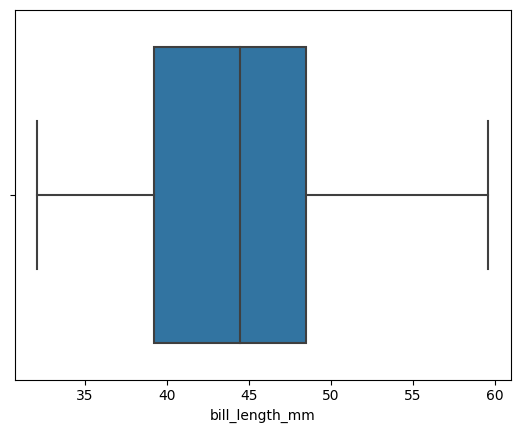

In [10]:
sns.boxplot(x=penguins["bill_length_mm"])


Let's do it for all numeric columns.


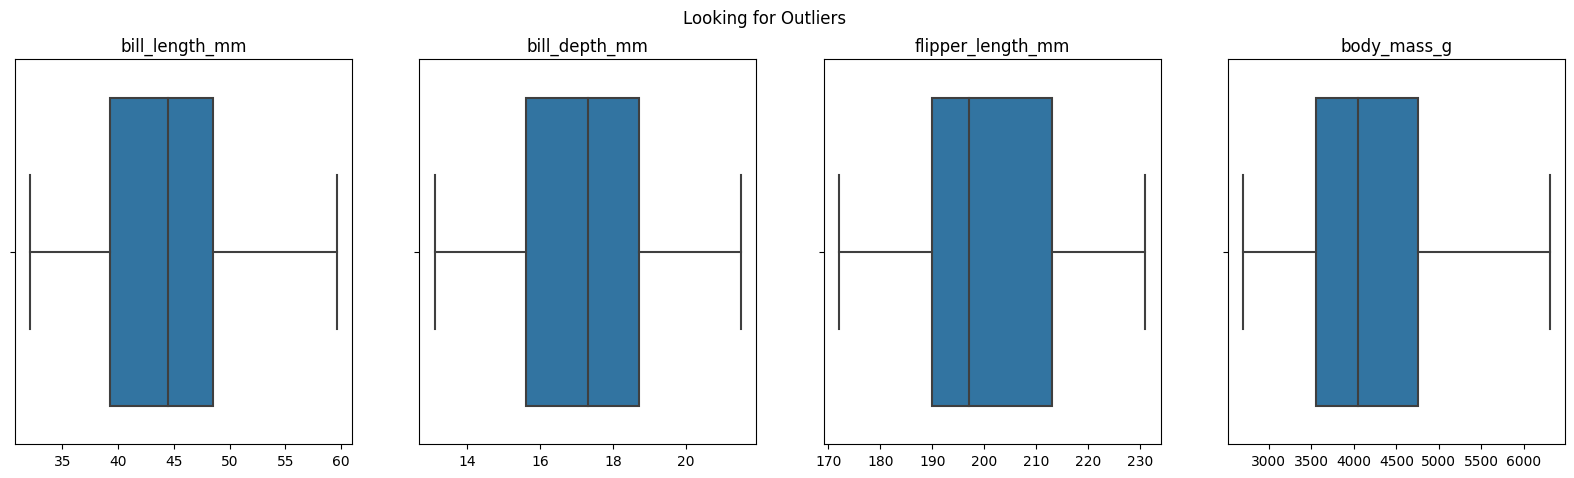

In [11]:
numeric_columns = penguins.select_dtypes(include=np.number).columns.values.tolist()  # type: ignore

figure, axes = plt.subplots(
    1,
    len(numeric_columns),
    sharex=False,
    figsize=(20, 5),
)
figure.suptitle("Looking for Outliers")
for index, column in enumerate(numeric_columns):  # type: ignore
    axes[index].set_title(column)
    sns.boxplot(
        ax=axes[index],
        data=penguins,
        x=column,
    )
    axes[index].set_xlabel("")



Doesn't seem to be outliers.

We will confirm it with the descriptive statistics of the data.


## Look into descriptive statistics of your data

We can use the `describe` DataFrame method.


In [12]:
penguins.describe()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


The 4 numeric columns are in millimeters, with different ranges, one decimal. As suspected, there are no apparent outliers.

![Bill Dimensions Illustration](images/bill_dimensions.png)


## Get an overview of the distribution of those variables, which are quantitative continuos

We can make a plot of the distribution of the values.


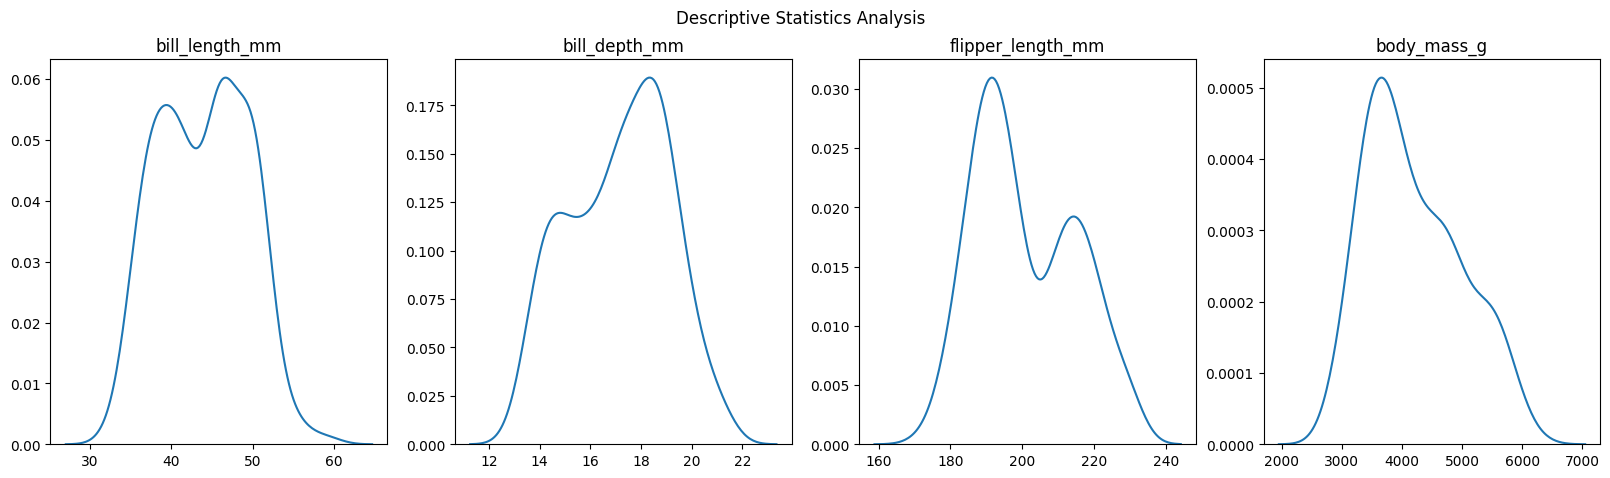

In [13]:
figure, axes = plt.subplots(
    1,
    len(numeric_columns),
    sharex=False,
    figsize=(20, 5),
)
figure.suptitle("Descriptive Statistics Analysis")
for index, column in enumerate(numeric_columns):  # type: ignore
    axes[index].set_title(column)
    sns.kdeplot(
        ax=axes[index],
        data=penguins,
        x=column,
    )
    axes[index].set_xlabel("")
    axes[index].set_ylabel("")


Not completely a normal distribution...

Wait! There are three kinds of penguins! That is the reason of the "weird" distribution...


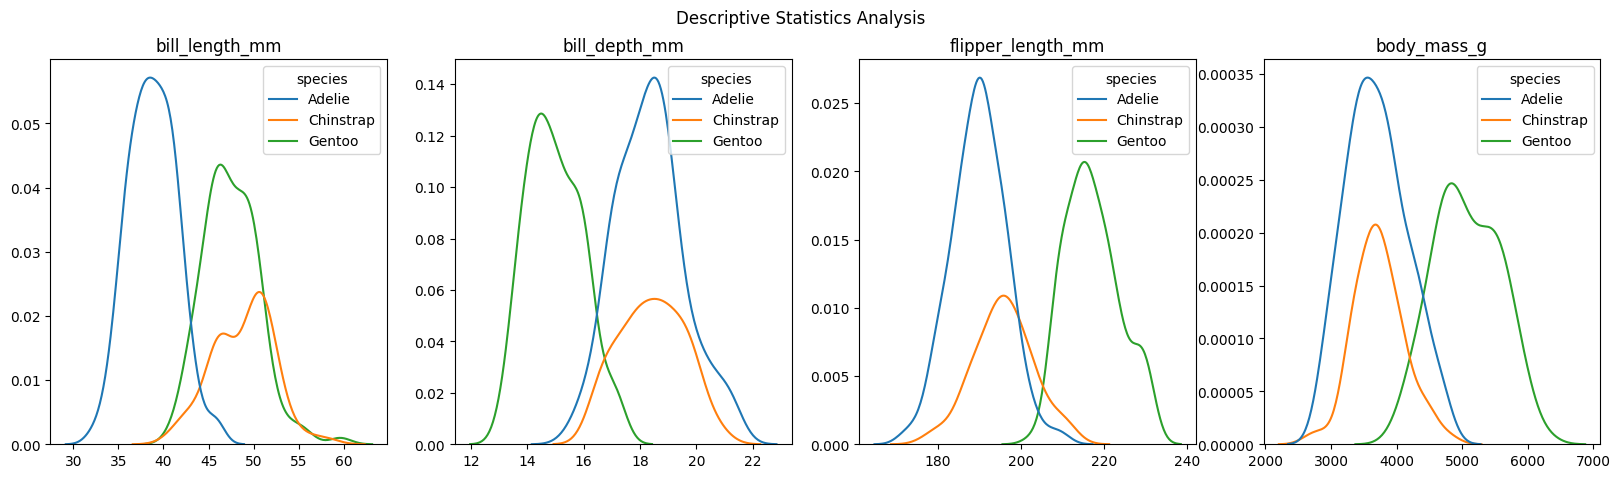

In [14]:
figure, axes = plt.subplots(
    1,
    len(numeric_columns),
    sharex=False,
    figsize=(20, 5),
)
figure.suptitle("Descriptive Statistics Analysis")
for index, column in enumerate(numeric_columns):  # type: ignore
    axes[index].set_title(column)
    sns.kdeplot(
        ax=axes[index],
        data=penguins,
        x=column,
        hue="species",
    )
    axes[index].set_xlabel("")
    axes[index].set_ylabel("")


Not in all cases, but it does shows how the distributions get closer to the normal distribution while separated by species. What about separating them by species AND sex?


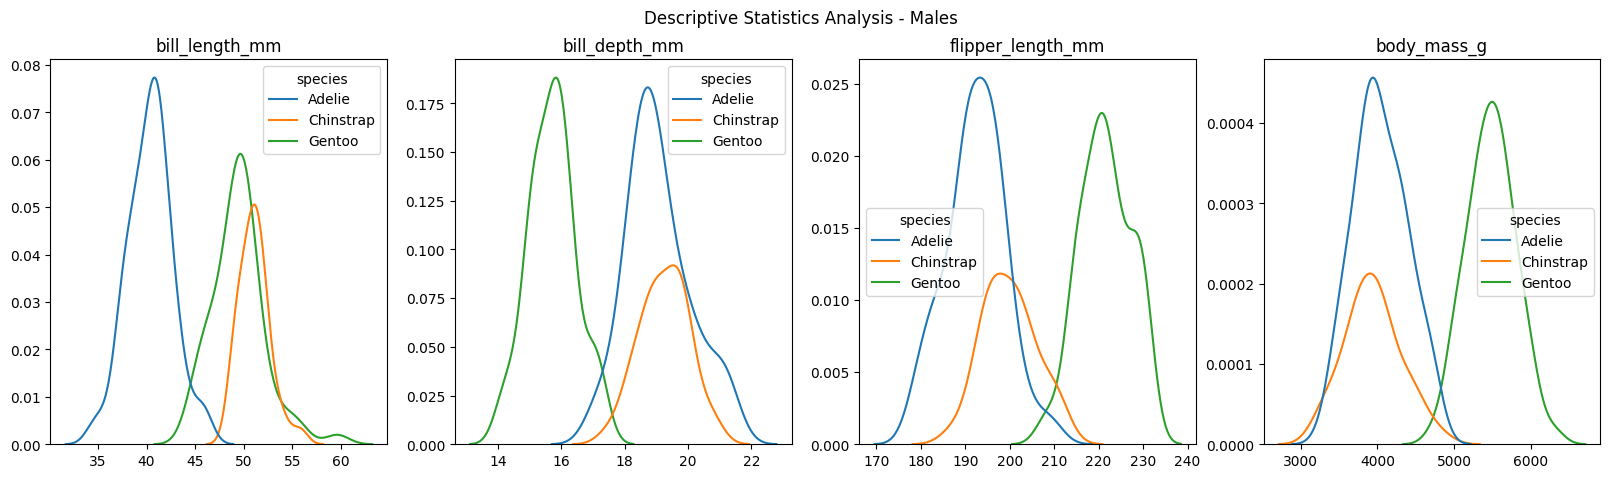

In [15]:
figure, axes = plt.subplots(
    1,
    len(numeric_columns),
    sharex=False,
    figsize=(20, 5),
)
figure.suptitle("Descriptive Statistics Analysis - Males")
for index, column in enumerate(numeric_columns):  # type: ignore
    axes[index].set_title(column)
    sns.kdeplot(
        ax=axes[index],
        data=penguins[penguins["sex"] == "Male"],
        x=column,
        hue="species",
    )
    axes[index].set_xlabel("")
    axes[index].set_ylabel("")


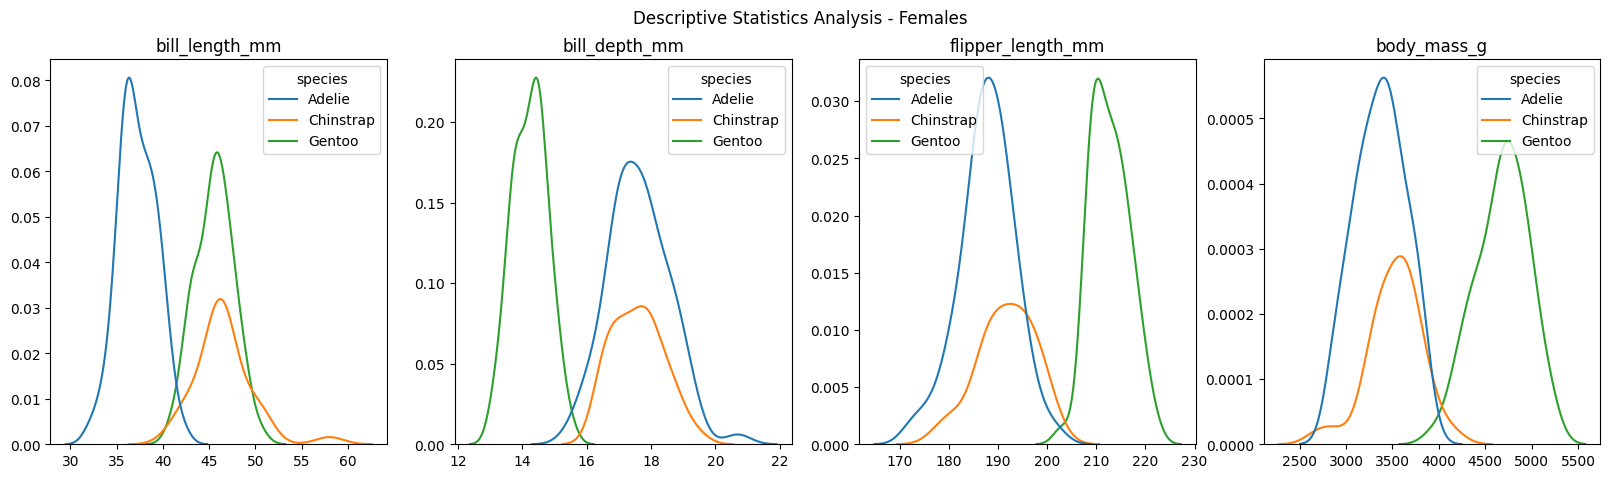

In [16]:
figure, axes = plt.subplots(
    1,
    len(numeric_columns),
    sharex=False,
    figsize=(20, 5),
)
figure.suptitle("Descriptive Statistics Analysis - Females")
for index, column in enumerate(numeric_columns):  # type: ignore
    axes[index].set_title(column)
    sns.kdeplot(
        ax=axes[index],
        data=penguins[penguins["sex"] == "Female"],
        x=column,
        hue="species",
    )
    axes[index].set_xlabel("")
    axes[index].set_ylabel("")


It helps "narrow" the distributions somewhat...


## Start Looking for better ways to show qualitative data in your dataset

Besides pie charts?


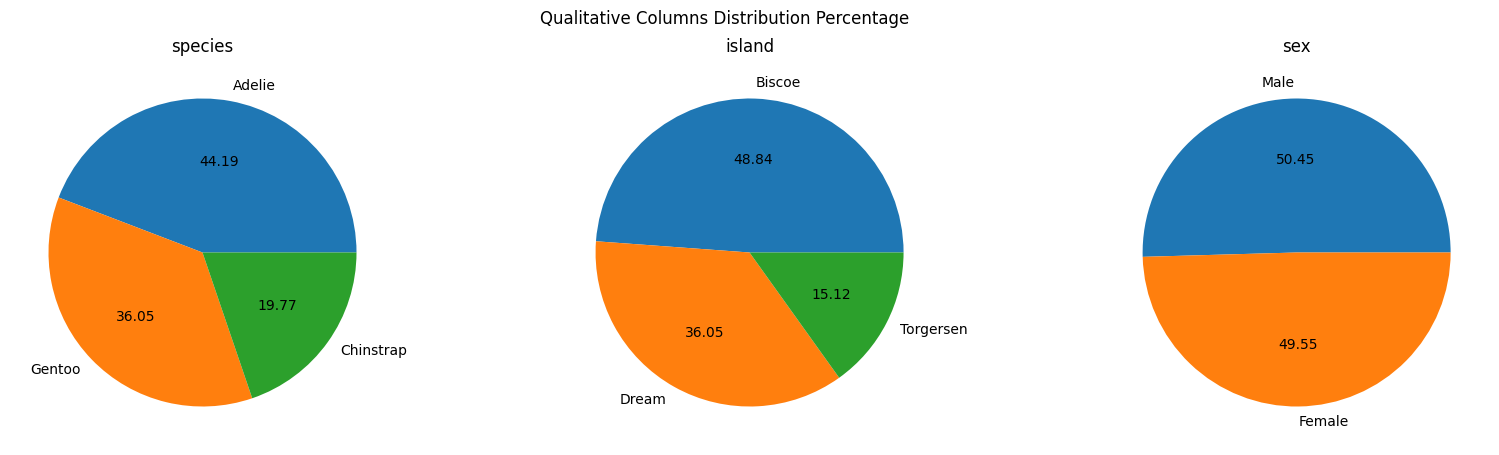

In [17]:
from cProfile import label


categorical_columns = penguins.select_dtypes(include="category").columns.values.tolist()

figure, axes = plt.subplots(
    1,
    len(categorical_columns),
    sharex=False,
    figsize=(20, 5),
)
figure.suptitle("Qualitative Columns Distribution Percentage")
for index, column in enumerate(categorical_columns):  # type: ignore
    axes[index].set_title(column)
    penguins[column].value_counts().plot(
        ax=axes[index],
        kind="pie",
        autopct="%0.2f",
    )
    axes[index].set_ylabel("")


# Play around with the correlation available between the features

We can use Seaborn ScatterPlots for that.


<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

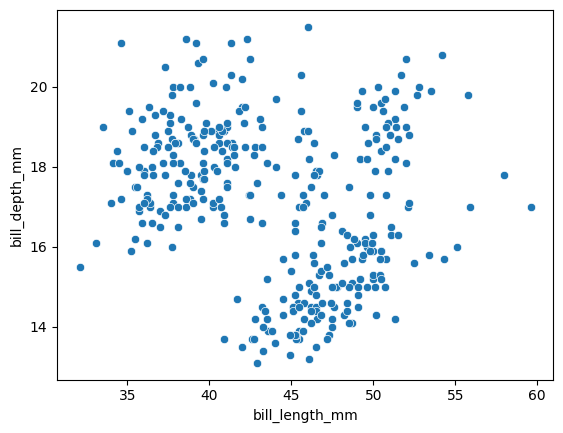

In [18]:
sns.scatterplot(
    data=penguins,
    x="bill_length_mm",
    y="bill_depth_mm",
)


And separate it by species...


<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

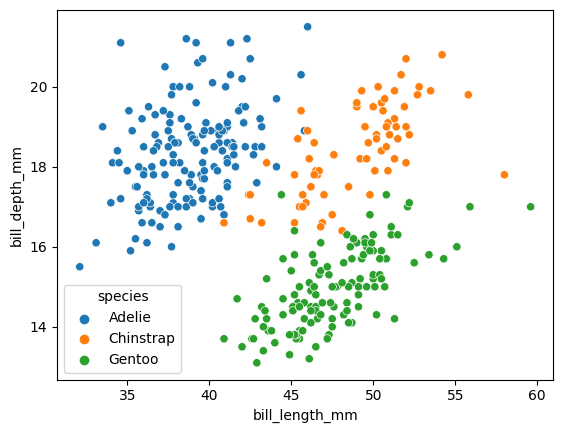

In [19]:
sns.scatterplot(
    data=penguins,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species",
)


And to do it for every feature combination. Good things Seaborn has PairPlots.


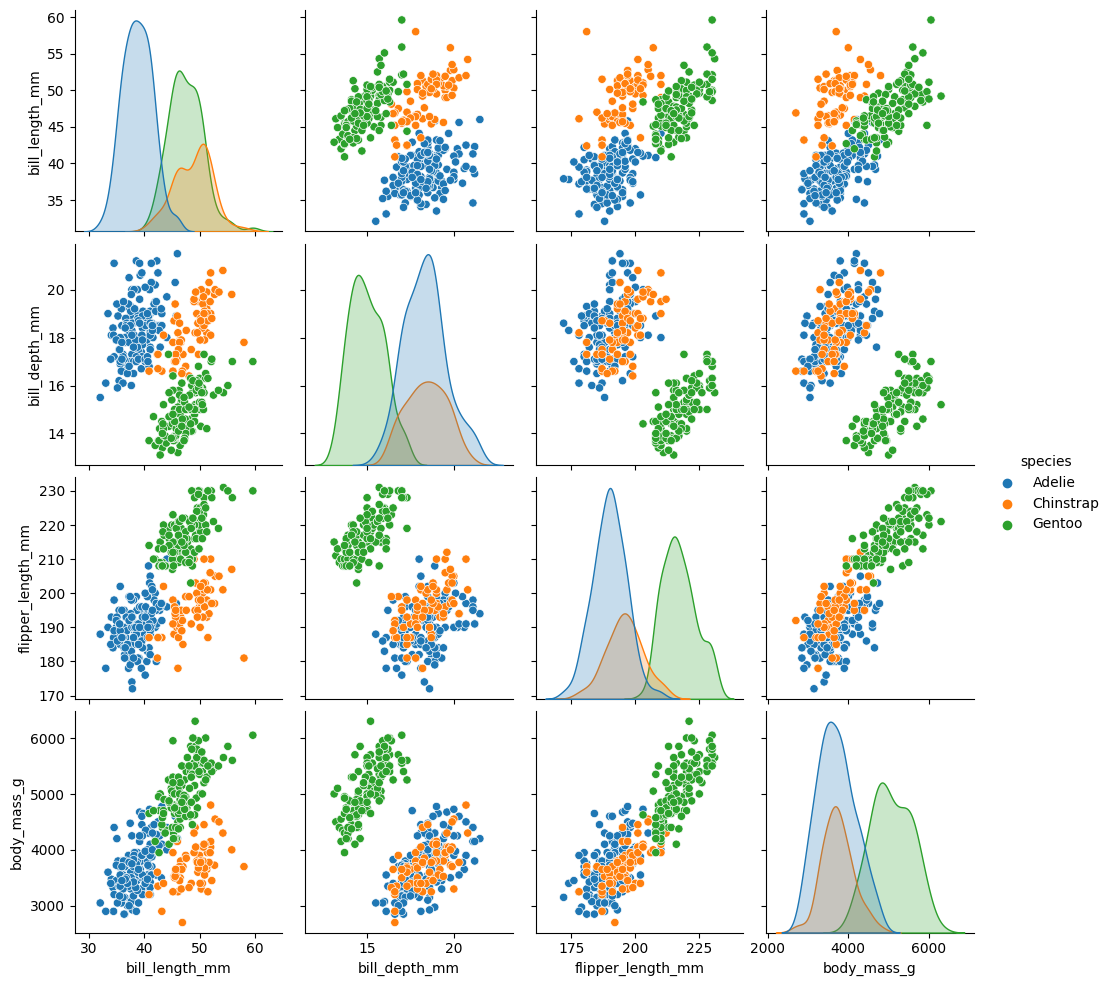

In [20]:
sns.pairplot(
    data=penguins,
    hue="species",
)


Now, if we want to see it "in numbers", we can use pandas `corr` function, which calculates the **Pearson Correlation Coefficient**. 

> The Pearson (product-moment) correlation coefficient is a measure of the linear relationship between two features. It’s the ratio of the covariance of x and y to the product of their standard deviations. It’s often denoted with the letter r and called Pearson’s r. Usually, the Pearson coefficient is obtained via a Least-Squares fit and a value of 1 represents a perfect positive relation-ship, -1 a perfect negative relationship, and 0 indicates the absence of a relationship between variables.

$$
r =
  \frac{ \sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}) }{%
        \sqrt{\sum_{i=1}^{n}(x_i-\bar{x})^2}\sqrt{\sum_{i=1}^{n}(y_i-\bar{y})^2}}
$$


In [21]:
correlations = penguins.corr()
display(correlations)


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


And we can plot that in a heatmap.


<AxesSubplot:>

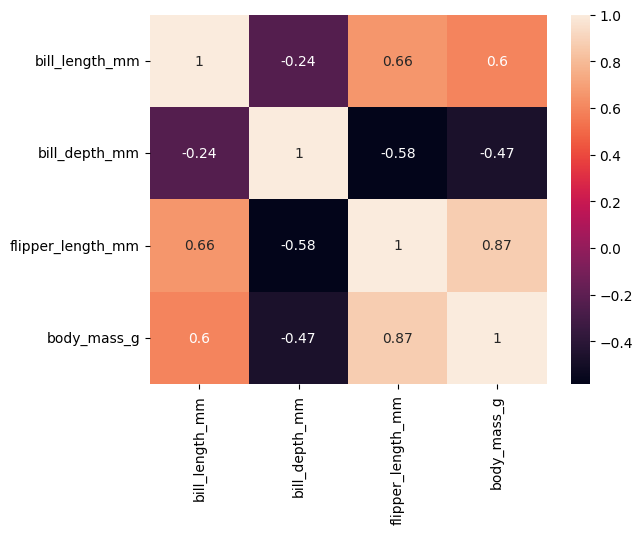

In [22]:
sns.heatmap(
    correlations,
    annot=True,
)
